In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [3]:
import os
import random
import shutil

data_dir = "/Users/huynhhung/Documents/TONY/PhantichdulieuvaGiaithuat/DOAN_CUOIKI/Dataset/Train"  
fake_dir = os.path.join(data_dir, "Fake")  
real_dir = os.path.join(data_dir, "Real")  

subset_dir = "path_to_subset"
train_dir = os.path.join(subset_dir, "train")
test_dir = os.path.join(subset_dir, "test")


os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(os.path.join(train_dir, "Fake"), exist_ok=True)
os.makedirs(os.path.join(train_dir, "Real"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Fake"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Real"), exist_ok=True)


fake_images = random.sample(os.listdir(fake_dir), 15000)
real_images = random.sample(os.listdir(real_dir), 15000)


for img in fake_images[:12000]:
    shutil.copy(os.path.join(fake_dir, img), os.path.join(train_dir, "Fake"))
for img in fake_images[12000:15000]:
    shutil.copy(os.path.join(fake_dir, img), os.path.join(test_dir, "Fake"))

for img in real_images[:12000]:
    shutil.copy(os.path.join(real_dir, img), os.path.join(train_dir, "Real"))
for img in real_images[12000:15000]:
    shutil.copy(os.path.join(real_dir, img), os.path.join(test_dir, "Real"))

print("Đã tạo tập dữ liệu con với 30.000 ảnh.")


Đã tạo tập dữ liệu con với 30.000 ảnh.


In [6]:
dir = "path_to_subset"
train_dir = os.path.join(dir, "train")
test_dir = os.path.join(dir, "test")

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size = 32,
    class_mode='binary'
)


Found 35084 images belonging to 2 classes.
Found 8770 images belonging to 2 classes.
Found 11741 images belonging to 2 classes.


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Lớp đầu ra
])




model.compile(optimizer=tf.keras.optimizers.Nadam()
,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,108,033 (19.49 MB)

 Trainable params: 5,108,033 (19.49 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, verbose=0, mode="auto")


history = model.fit(
    train_generator,
    epochs=1,
    validation_data=val_generator,
    callbacks=[early_stopping]
    
)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


600/600 ━━━━━━━━━━━━━━━━━━━━ 121s 201ms/step - accuracy: 0.5437 - loss: 0.6873 - val_accuracy: 0.6367 - val_loss: 0.6371


In [1]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc * 100:.2f}%")

NameError: name 'model' is not defined

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(128, 128))  # Resize ảnh về 128x128
    img_array = img_to_array(img) / 255.0  # Chuẩn hóa về [0,1]
    img_array = np.expand_dims(img_array, axis=0)  # Thêm batch dimension
    return img_array

In [17]:
def predict_image(image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)[0][0]  # Dự đoán
    label = "Real" if prediction > 0.5 else "Fake"  # Ngưỡng 0.5
    confidence = (1 - prediction) if prediction < 0.5 else prediction
    return label, confidence

# Thử dự đoán với một ảnh
image_path = "/Users/huynhhung/Documents/TONY/PhantichdulieuvaGiaithuat/DOAN_CUOIKI/Dataset/Test/Fake/fake_16.jpg"  # Đường dẫn ảnh
label, confidence = predict_image(image_path)
print(f"Predicted: {label} ({confidence:.2%} confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicted: Fake (85.07% confidence)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


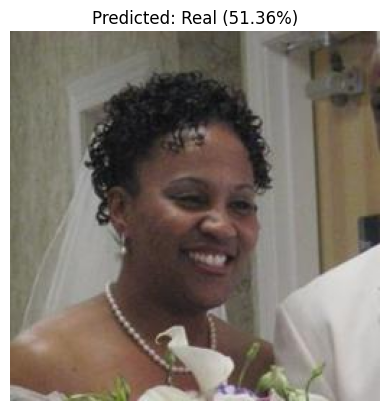

In [19]:
import matplotlib.pyplot as plt

def show_prediction(image_path):
    img = load_img(image_path)
    label, confidence = predict_image(image_path)

    plt.imshow(img)
    plt.title(f"Predicted: {label} ({confidence:.2%})")
    plt.axis("off")
    plt.show()

# Hiển thị dự đoán cho một ảnh
show_prediction("/Users/huynhhung/Documents/TONY/PhantichdulieuvaGiaithuat/DOAN_CUOIKI/path_to_subset/test/Real/real_14.jpg")


In [171]:
model.save("deepfake_cnn_Nadam-Earlystopping.h5")


In [21]:
model = tf.keras.models.load_model("deepfake_cnn_Nadam-Earlystopping.h5")


In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size = 32,
    class_mode='binary',
    shuffle=False

)
true_labels = test_generator.classes


predictions = model.predict(test_generator)




Found 11741 images belonging to 2 classes.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


367/367 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step


In [23]:
predicted_classes = (predictions > 0.5).astype(int)


In [10]:
evaluation = model.evaluate(test_generator)

# The evaluate method returns the loss and accuracy
loss, accuracy = evaluation

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.9460 - loss: 0.1476
Test Loss: 0.1944
Test Accuracy: 92.50%


In [176]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(true_labels, predicted_classes , normalize='pred')
result

array([[0.80139082, 0.04948025],
       [0.19860918, 0.95051975]])

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(true_labels, predicted_classes, target_names=test_generator.class_indices.keys()))


              precision    recall  f1-score   support

        Fake       0.90      0.95      0.93      5876
        Real       0.95      0.90      0.92      5865

    accuracy                           0.92     11741
   macro avg       0.92      0.92      0.92     11741
weighted avg       0.92      0.92      0.92     11741



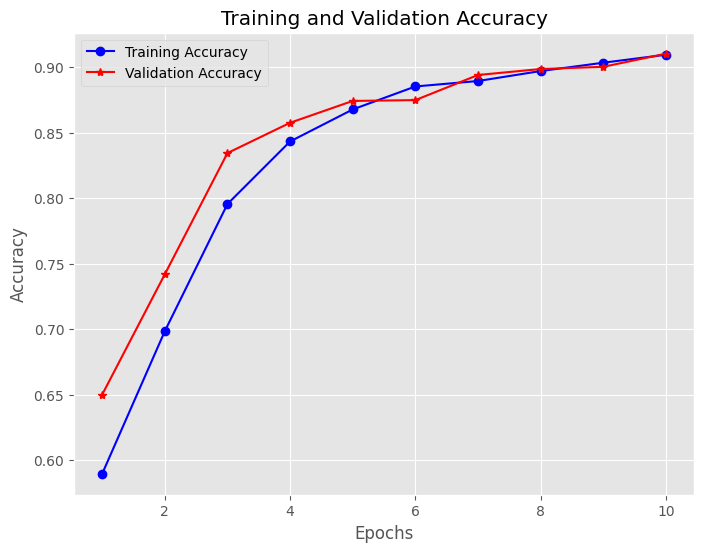

In [178]:
import matplotlib.pyplot as plt


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)


plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')  
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')  
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
# plt.grid()
plt.show()

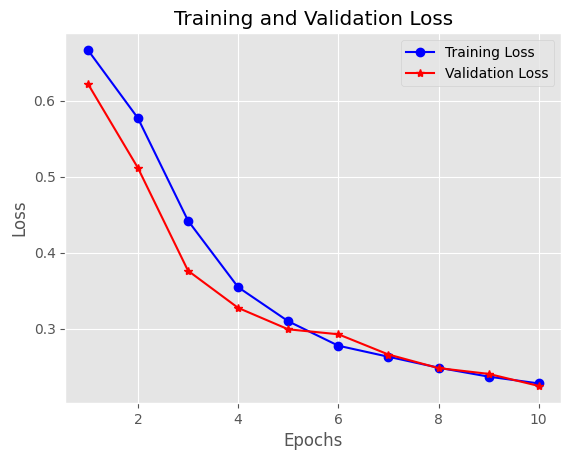

In [182]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)


# plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')  
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# plt.grid()
plt.show()

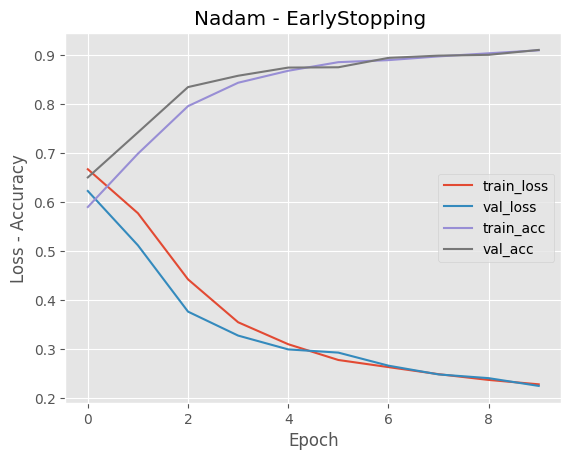

In [183]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc")
plt.title("Nadam - EarlyStopping ")
plt.xlabel("Epoch")
plt.ylabel("Loss - Accuracy")
plt.legend()

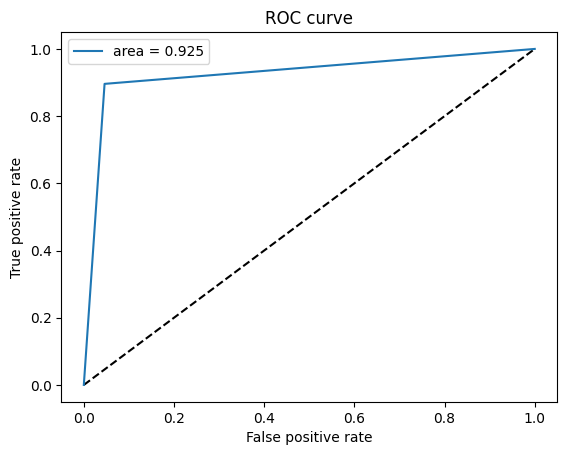

In [13]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.classes, predicted_classes)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(.5)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

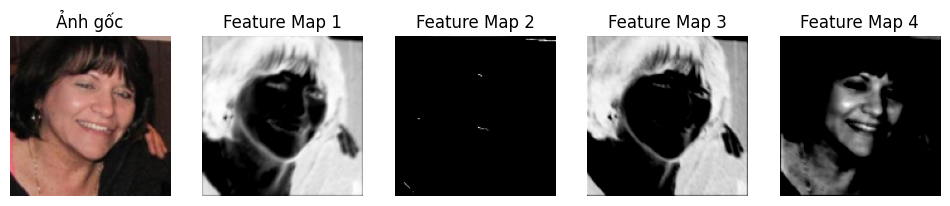

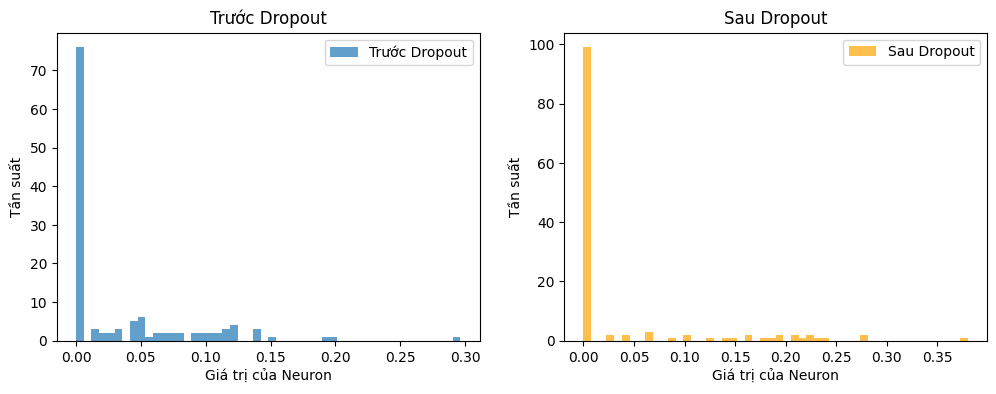

In [25]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
# Định nghĩa mô hình CNN

transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize ảnh về 128x128
    transforms.ToTensor(),  # Chuyển thành tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Chuẩn hóa
])

# Đường dẫn đến thư mục train và test
data_dir = "path_to_subset"  # Thay bằng đường dẫn đúng
train_dir = os.path.join(data_dir, "Train")
test_dir = os.path.join(data_dir, "Test")

# Load dữ liệu
train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
class M(nn.Module):
    def __init__(self):
        super(M, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(128, 4)  # 4 lớp đầu ra

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = M().to(device)

def visualize_feature_map():
    model.eval()  # Chuyển sang chế độ đánh giá
    images, _ = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra
    img = images[0].unsqueeze(0).to(device)  # Lấy ảnh đầu tiên, thêm chiều batch (1x3x64x64)

    # Tính feature map từ conv1
    with torch.no_grad():
        conv1_output = torch.relu(model.conv1(img))  # Qua conv1 và ReLU

    # Chuyển ảnh gốc từ [-1,1] về [0,1] (nếu cần)
    img_show = img.cpu().squeeze().permute(1, 2, 0).numpy()  # Chuyển về (H, W, C)
    img_show = (img_show + 1) / 2  # Chuyển từ [-1,1] về [0,1]

    # Vẽ ảnh gốc
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 5, 1)
    plt.title("Ảnh gốc")
    plt.imshow(img_show)  # Không còn lỗi về range
    plt.axis('off')

    # Vẽ một số feature maps từ conv1
    for i in range(4):  # Hiển thị 4 feature maps đầu tiên
        plt.subplot(1, 5, i + 2)
        plt.title(f"Feature Map {i+1}")
        feature_map = conv1_output[0, i].cpu().numpy()

        # Chuẩn hóa feature map về [0,1]
        feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())

        plt.imshow(feature_map, cmap='gray')
        plt.axis('off')

    plt.show()

visualize_feature_map()
def visualize_dropout():
    model.eval()  # Chuyển sang chế độ đánh giá
    images, _ = next(iter(test_loader))  # Lấy một batch từ tập kiểm tra
    img = images[0].unsqueeze(0).to(device)  # Lấy ảnh đầu tiên

    with torch.no_grad():
        x = model.pool(torch.relu(model.conv1(img)))
        x = model.pool(torch.relu(model.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)
        fc1_output = torch.relu(model.fc1(x))  # Kết quả trước dropout

        model.train()  # Chuyển về train mode để Dropout có hiệu lực
        dropout_output = model.dropout(fc1_output)  # Áp dụng Dropout
        model.eval()  # Quay lại chế độ eval

    # Chuyển tensor sang numpy để hiển thị
    fc1_output_np = fc1_output.cpu().numpy().flatten()
    dropout_output_np = dropout_output.cpu().numpy().flatten()

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(fc1_output_np, bins=50, alpha=0.7, label="Trước Dropout")
    plt.title("Trước Dropout")
    plt.xlabel("Giá trị của Neuron")
    plt.ylabel("Tần suất")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(dropout_output_np, bins=50, alpha=0.7, label="Sau Dropout", color="orange")
    plt.title("Sau Dropout")
    plt.xlabel("Giá trị của Neuron")
    plt.ylabel("Tần suất")
    plt.legend()

    plt.show()

visualize_dropout()

In [29]:
conv1_layer = model.layers[0]
conv1_layer

<Conv2D name=conv2d_4, built=True>

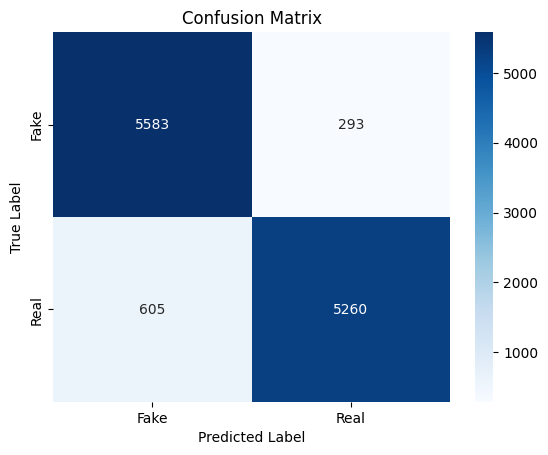

              precision    recall  f1-score   support

        Fake       0.90      0.95      0.93      5876
        Real       0.95      0.90      0.92      5865

    accuracy                           0.92     11741
   macro avg       0.92      0.92      0.92     11741
weighted avg       0.92      0.92      0.92     11741



In [27]:
import seaborn as sns

cm = confusion_matrix(test_generator.classes, predicted_classes)
arget_names=test_generator.class_indices.keys()# Vẽ confusion matrix
# plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=arget_names, yticklabels=arget_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# In báo cáo phân loại

print(classification_report(test_generator.classes, predicted_classes, target_names=arget_names))